In [1]:
import numpy as np
from constants import *
from compute_hc import log_hc_Q, log_hc_kshifted, f_limit, hc_kshifted, hc_Q
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
Mc=4.16*1e+9*MS
fi=1e-9
ff=10**(-5)
f0=1e-9
e0=0.9
n_har=300
n_pts=100
eta=0.25
z=0.02
z2=0.5
Mc2=4.16*1e+8*MS
M=Mc/(eta**(3/5))

In [3]:
np.log10(f_limit(Mc, eta, 0.25, e0))

-8.17409467694617

In [4]:
f_c=f_limit(Mc,eta,0.5,e0)
f_c

1.8943067925589338e-08

In [5]:
out_Q=log_hc_Q(Mc,eta,n_har,n_pts,fi,ff,f0,e0,z)

In [6]:
out_k=log_hc_kshifted(Mc,eta,n_har,n_pts,fi,f0,e0,z)

In [7]:
out_k2=log_hc_kshifted(Mc2,eta,n_har,n_pts,fi,f0,e0,z2)

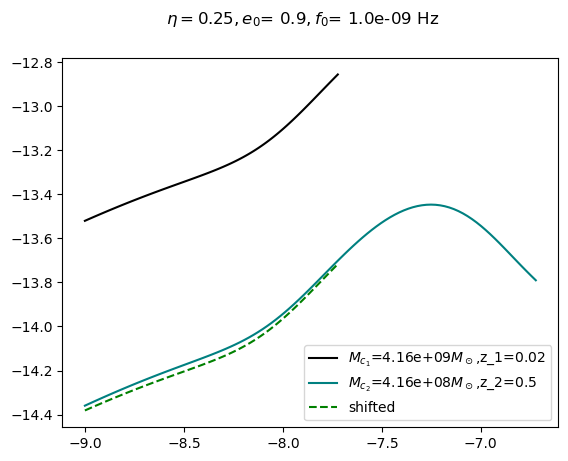

In [8]:
plt.plot(out_k[0],out_k[1],color='k',label=r'$M_{c_1}$='+str("{:.2e}".format(Mc/MS))+r"$M_\odot$"+r',z_1='+str(z))

plt.plot(out_k2[0],np.log10(out_k2[3]),color='teal',label=r'$M_{c_2}$='+str("{:.2e}".format(Mc2/MS))+r"$M_\odot$"+r',z_2='+str(z2))



plt.plot(out_k[0],np.log10(out_k[3]*(Mc2/Mc)**(5/6)*((1+z2)/(1+z))**(-1/6)),linestyle='--',color='g',label='shifted')


plt.suptitle(r'$\eta=$'+str(eta)+'$, e_0$= '+str(e0)+'$, f_0$= '+str("{:.1e}".format(f0))+' Hz')

plt.legend()
plt.savefig("shift_M%s_e%s.jpg"%("{:.1f}".format(Mc/(MS*1e9)),e0),dpi=1000)
plt.show()

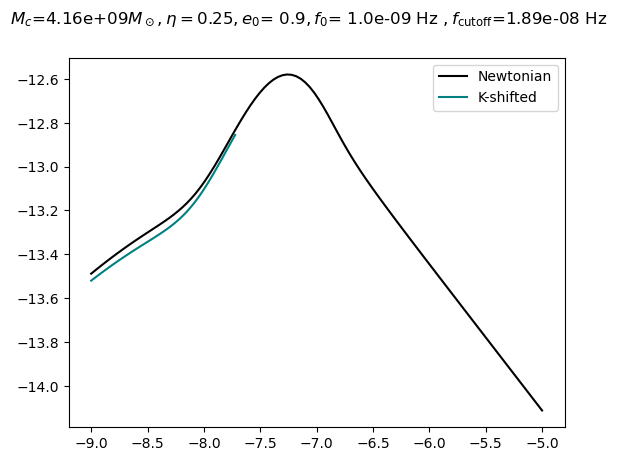

In [9]:
plt.plot(out_Q[0],out_Q[1],color='k',label='Newtonian')

plt.plot(out_k[0],out_k[1],color='teal',label='K-shifted')

plt.suptitle(r'$M_c$='+str("{:.2e}".format(Mc/MS))+r"$M_\odot$"+r'$, \eta=$'
             +str(eta)+'$, e_0$= '+str(e0)+'$, f_0$= '+str("{:.1e}".format(f0))+' Hz'+r'$ \ ,f_{\rm{cutoff}}$='
             +str("{:.2e}".format(f_c))+' Hz')
plt.legend()
plt.savefig("plot_M%s_e%s.jpg"%("{:.1f}".format(Mc/(MS*1e9)),e0),dpi=1000)
plt.show()


In [10]:
fk=np.array(out_k[2])

In [11]:
hck=out_k[3]

In [12]:
def hc_fit_prev(f,a1,a2,a3,b1,b2,b3):
    j=f/1e-8
    return +a1*j**a2*np.exp(-a3*j)+b1*j**b2*np.exp(-b3*j)

# def hc_fit_prev(f,a1,a2,a3,b1,b2,b3,c1,c2,c3):
#     j=f/1e-8
#     return a1*j**(a2)*np.exp(-a3*j)+b1*j**(-b2)*np.exp(-b3*j)+c1*j**(-c2)*np.exp(-c3/j)

popt, pcov = curve_fit(hc_fit_prev, fk,hck)

# def hc_fit_prev2(f,a1,a2,a3,b1,b2,b3,c1,c2,c3):
# 	w=[]
# 	for i in f:
# 		j=i/1e-8
# 		w.append(a1*j**a2*np.exp(-a3*j)+b1*j**b2*np.exp(-b3*j)+c1*j**(-c2)*np.exp(-c3/j))
# 	return np.array(w,dtype=float)
# print(x1)
# yK_fit=hc_fit_prev2(fK, *x1) 


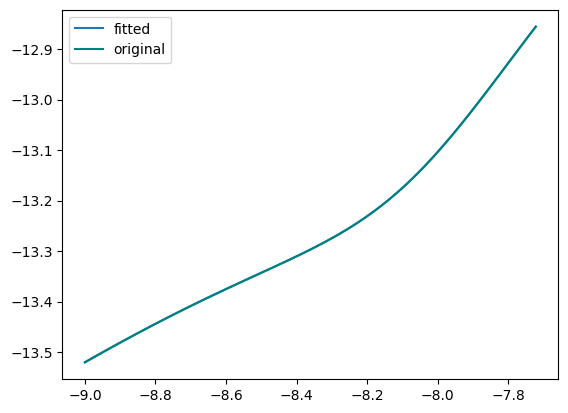

In [13]:
plt.plot(np.log10(fk),np.log10(hc_fit_prev(fk, *popt)),label='fitted')
plt.plot(out_k[0],out_k[1],color='teal',label='original')
plt.legend()
plt.show()

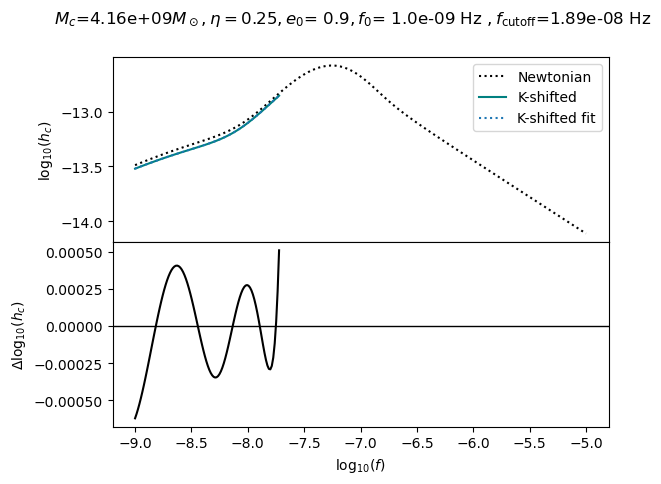

In [14]:
fig, axs = plt.subplots(2, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
axs[0].plot(out_Q[0],out_Q[1],color='k',linestyle=':',label='Newtonian')
axs[0].plot(np.log10(fk),np.log10(hc_fit_prev(fk, *popt)),color='teal',label='K-shifted')
axs[0].plot(out_k[0],out_k[1],linestyle='dotted',label='K-shifted fit')
axs[0].set_ylabel(r'$ \log_{10}(h_c)$') 
axs[0].legend()

axs[1].plot(out_k[0],np.log10(hc_fit_prev(fk, *popt))-out_k[1],color='k')
axs[1].axhline(y=0,color='k',linewidth=1)
axs[1].set_ylabel(r'$\Delta \log_{10}(h_c)$')
axs[1].set_xlabel(r'$\log_{10}(f)$')

plt.suptitle(r'$M_c$='+str("{:.2e}".format(Mc/MS))+r"$M_\odot$"+r'$, \eta=$'
             +str(eta)+'$, e_0$= '+str(e0)+'$, f_0$= '+str("{:.1e}".format(f0))+' Hz'+r'$ \ ,f_{\rm{cutoff}}$='
             +str("{:.2e}".format(f_c))+' Hz')
                                                               
fig.savefig('kshifted_curvefit_fit.png', dpi=1000) 
plt.show()

In [15]:
dn0=1e-4*Mpc**(-3)/Gyr
H0=70*1e3/(Mpc)

In [16]:
def comoving_density_AN(MC,Z):
    dzdt=(1+Z)*np.sqrt(0.3*(1+Z)**3+0.7)
    w=(np.exp(-MC/(1e8*MS))*(1+Z)**2*np.exp(-Z/2))/dzdt
    return w/MC

In [17]:
from scipy import integrate

result=integrate.nquad(lambda MC,Z:comoving_density_AN(MC,Z)*(MC/Mc)**(5/3)*((1+Z)/(1+z))**(-1/3)
                       , [[1e6*MS,1e11*MS],[0.2,5]])
result


(0.0023496600193018036, 1.349145239469096e-08)

In [18]:
hck=hc_kshifted(Mc,eta,n_har,n_pts,fi,f0,e0,z)

In [19]:
loghc_model_AN=np.log10(np.sqrt(np.array(hck[1])*dn0/H0*result[0]))

In [20]:
hcQ=hc_Q(Mc,eta,n_har,n_pts,fi,ff,f0,e0,z)

In [21]:
loghc_Q_model_AN=np.log10(np.sqrt(hcQ[1]*dn0/H0*result[0]))

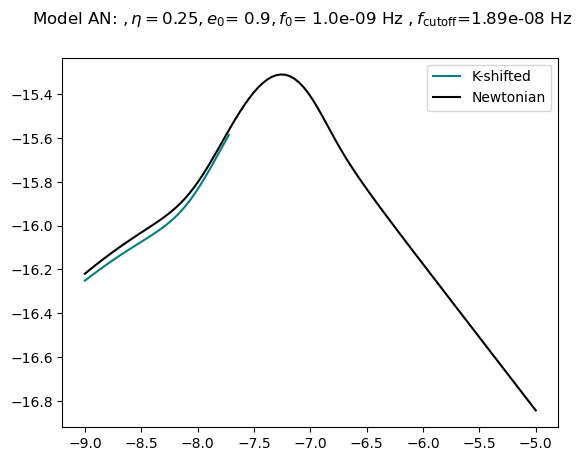

In [22]:
plt.plot(np.log10(hck[0]),loghc_model_AN,label='K-shifted',color='teal')
plt.plot(np.log10(hcQ[0]),loghc_Q_model_AN,label='Newtonian',color='k')
plt.suptitle('Model AN: '+r'$, \eta=$'
             +str(eta)+'$, e_0$= '+str(e0)+'$, f_0$= '+str("{:.1e}".format(f0))+' Hz'+r'$ \ ,f_{\rm{cutoff}}$='
             +str("{:.2e}".format(f_c))+' Hz')
plt.legend()
plt.savefig("Model_AN_e%s.jpg"%(e0),dpi=1000)
plt.show()